<a href="https://colab.research.google.com/github/fab-rodrigs/numerical-calculation/blob/main/TP1_CALNUM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Trabalho Prático 1 - Calculo Numérico**
>Aluno: Fabrício Rodrigues de Santana

###**1. Apresentar um problema da área elétrica;**

O problema proposto envolve a determinação do ponto de operação de um amplificador com um transistor bipolar (BJT) em configuração de emissor comum. O transistor é usado para amplificar um sinal de entrada aplicado à base do transistor. Para esse problema, foi utilizado os parâmetros do transistor BC337.

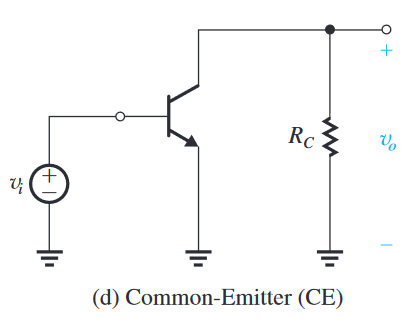

*Figura 1 - Amplificador BJT em configuração de emissor comum.*

###**2. Explicar o porquê que o problema é um problema;**

O ponto de operação de um transistor em um amplificador é crucial para garantir o desempenho adequado do circuito. Ele determina a região de operação do transistor e afeta diretamente características importantes do amplificador, como ganho de tensão, linearidade e eficiência.

###**3. Apresentar a sua solução analítica ou a explicação do por que ela não é possível;**

As equações do modelo de Ebers-Moll descrevem o comportamento de um transistor bipolar (BJT) e são altamente não lineares devido à presença de exponenciais e funções logarítmicas. Essas equações são usadas para modelar a relação entre a corrente do coletor (IC) e a tensão base-emissor (VBE) do transistor.

A primeira equação, que relaciona IC com VBE, inclui uma exponencial:

\begin{align*}
I_C &= I_S \cdot (e^{\frac{V_{BE}}{V_T}} - 1) \\
\end{align*}

onde IS é a corrente de saturação reversa, VBE é a tensão base-emissor e VT é a tensão térmica.

A segunda equação, que relaciona VBE com IC, inclui um logaritmo:

\begin{align*}
V_{BE} &= V_T \cdot \ln\left(\frac{I_S}{I_C} + 1\right) \\
\end{align*}

Os valores de Is e Vt são constantes, e em alguns casos são fornecidos pelo fabricante. Nesse caso, os valores do transistor BC337 são:

\begin{align*}
I_{\text{S}} = 1 \times 10^{-15} \, \text{A}
\end{align*}

\begin{align*}
V_{\text{T}} = 25 \times 10^{-3} \, \text{V}
\end{align*}

Essas funções não lineares tornam difícil, senão impossível, isolar IC ou VBE de forma analítica para uma solução explícita em termos das outras variáveis. Isso ocorre devido à complexidade matemática das exponenciais e logaritmos envolvidos, tornando a manipulação algébrica direta das equações impraticável.

Além disso, as equações do modelo de Ebers-Moll são derivadas com base em uma série de simplificações e pressuposições sobre o comportamento do transistor, o que pode introduzir erros significativos se essas simplificações não forem válidas para o transistor específico ou para as condições de operação do circuito.

Por essas razões, é preferível utilizar métodos numéricos, que são capazes de lidar com a natureza não linear das equações e podem encontrar soluções iterativas com boa precisão e eficiência.




###**4. Escolher e justificar a escolha de um método numérico que resolva o problema proposto;**

Para encontrar o ponto de operação do transistor, é necessário recorrer a métodos numéricos que possam lidar eficazmente com sistemas de equações não lineares. Dentre os métodos numéricos disponíveis, optou-se pelo método de Newton-Raphson devido à sua eficácia na resolução de sistemas de equações não lineares e sua capacidade de encontrar soluções iterativas com boa precisão.

O método de Newton-Raphson é um método iterativo que utiliza aproximações sucessivas para encontrar as raízes de uma função. Ele é especialmente adequado para resolver sistemas de equações não lineares, como as equações do modelo de Ebers-Moll, pois converge rapidamente para uma solução quando iniciado com uma estimativa inicial razoável.

Além disso, o método de Newton-Raphson permite controlar a precisão da solução ajustando-se uma tolerância de convergência, garantindo que a solução obtida seja suficientemente precisa para atender aos requisitos do projeto.

Portanto, dada a natureza altamente não linear das equações do modelo de Ebers-Moll e a necessidade de encontrar soluções numéricas eficientes e precisas, o método de Newton-Raphson é a escolha adequada para resolver o problema proposto. Ele proporciona uma abordagem robusta e confiável para determinar o ponto de operação do transistor em um amplificador emissor-comum.




###**5. Apresentar a resolução do problema pelo método numérico escolhido;**

Para resolver o problema, as equações do transistor (baseadas no modelo de pequenos sinais) foram implementadas no código. As equações, citadas anteriormente, serão dispostas no código da seguinte forma:

\begin{align*}
f_1(V_{BE}, I_C) &= I_C - I_S \cdot (e^{\frac{V_{BE}}{V_T}} - 1) \\
f_2(V_{BE}, I_C) &= V_{BE} - V_T \cdot \ln\left(\frac{I_S}{I_C} + 1\right)
\end{align*}

O método de Newton-Raphson iterativamente converge para os valores de IC​ e VBE​ que representam o ponto de operação do transistor.

In [ ]:
import numpy as np

def f_tbj(Vbe, Ic, Is, Vt):
    f1 = Ic - Is * (np.exp(Vbe / Vt) - 1)
    f2 = Vbe - Vt * np.log((Ic / Is) + 1)
    return np.array([f1, f2])

def newton_raphson(f_tbj, guess, Is, Vt, tol=1e-6, max_iter=100):
    x = guess
    iter = 0

    while iter < max_iter:
        f = f_tbj(x[0], x[1], Is, Vt)

        df1_vbe = -Is/Vt * (np.exp(x[0]/Vt))
        df1_ic = 1
        df2_vbe = 1
        df2_ic = (Vt * Is) / (x[1] * (x[1] + Is))

        J = np.array([
            [df1_vbe, df1_ic],
            [df2_vbe, df2_ic]
        ])

        x -= np.linalg.inv(J) @ f # multiplicação inversa jacobiana pelo vetor das funções

        if np.all(np.abs(f) < tol):
            break

        iter += 1

    return x, iter

Is = 1e-15  # corrente de saturação reversa do transistor (A)
Vt = 25e-3  # tensão térmica do transistor (V)

guess = np.array([0.7, 1e-3])  # chutes iniciais para Vbe e Ic

result, iter = newton_raphson(f_tbj, guess, Is, Vt)

print("Ponto de Operação do Amplificador:")
print("Tensão Base-Emissor (Vbe):", result[0], "V")
print("Corrente de Coletor (Ic):", result[1], "A")
print("Quantidade de iterações:", iter)


Ponto de Operação do Amplificador:
Tensão Base-Emissor (Vbe): 0.6883780010745673 V
Corrente de Coletor (Ic): 0.0009085538921371618 A
Quantidade de iterações: 3


Na função newton_raphson, o método opera iterativamente, atualizando as estimativas das incógnitas em cada iteração até que uma condição de convergência seja satisfeita. Em cada iteração, o vetor das funções é calculado para as estimativas atuais das incógnitas. Este vetor representa as equações do sistema que esta sendo resolvido.

Ao atualizar as estimativas das raízes no método de Newton-Raphson para sistemas de equações não lineares, podemos usar a expressão:

\begin{align*}
x_{i+1} = x_i - J^{-1} \cdot f
\end{align*}

onde $x_i$ é o vetor de estimativas das raízes na iteração $i$, $f$ é o vetor de funções do sistema e $J$ é a matriz Jacobiana. Esta formulação permite atualizar eficientemente as estimativas das raízes em cada iteração do método.

Na implementação do código fornecido, a atualização das estimativas das raízes é realizada com a linha:

\begin{align*}
x -= \text{np.linalg.inv}(J) @ f
\end{align*}

onde $x$ é o vetor de estimativas das raízes, $J$ é a matriz Jacobiana e $f$ é o vetor de funções do sistema. Esta operação é equivalente à atualização das estimativas das raízes de acordo com a fórmula do método de Newton-Raphson para sistemas de equações não lineares.


Quando o método convergir ou atingir o número máximo de iterações, as estimativas finais das incógnitas são retornadas, juntamente com o número de iterações realizadas.

###**6. Justificar se a solução obtida é adequada – considerações finais;**

A solução obtida pelo método de Newton-Raphson é adequada, pois fornece uma estimativa precisa do ponto de operação do transistor no amplificador. A precisão da solução dependerá dos parâmetros do transistor, bem como da precisão do método numérico utilizado.

A solução obtida pode ser comparada com a curva ICxVBE do transistor. Essa comparação permitirá verificar se os valores calculados estão dentro das faixas esperadas.

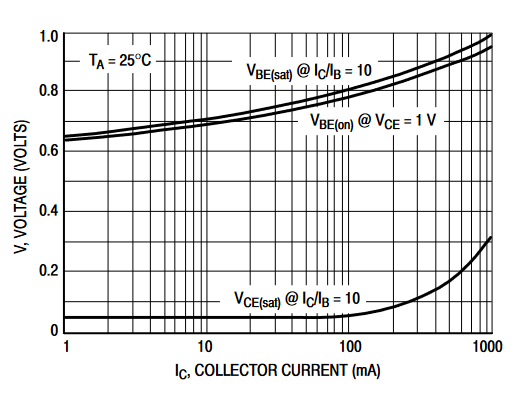

*Figura 2 - Tensões em função da corrente de coletor (IC).*

Essa é uma curva do transistor TBJ BC337, onde pode ser observado que os valores obtidos através dos métodos numéricos estão bem próximos dos valores fornecidos pelo fabricante. Nem todos fabricantes fornecem essa informação na folha de dados do componente e cada componente possuem parâmetros de corrente de saturação reversa (Is) e tensão térmica (Vt) diferentes. Portanto, torna-se útil o uso de métodos numéricos para encontrar o ponto de polarização de um transistor.

Resolver o problema do ponto de operação de um amplificador com transistor bipolar NPN é essencial para o projeto e análise de circuitos eletrônicos. Embora uma solução analítica direta possa ser difícil de alcançar devido à complexidade das equações envolvidas, o uso de métodos numéricos, como o método de Newton-Raphson, oferece uma abordagem eficaz e precisa para determinar o ponto de operação.

###**7. Referências bibliográficas.**

*Sedra, A. S., & Smith, K. C. (2004). Microelectronic Circuits (7th ed.). Oxford University Press.*

*Seiffert, G. P., Chiquetti, R., Avila, S. L. (2021). Cálculo Numérico Aplicado à Engenharia Elétrica com Python. 1ª Edição. Florianópolis: Publicação do IFSC.*

*ON Semiconductor. (2013). BC337, BC337-25, BC337-40 Amplifier Transistors: NPN Silicon. Rev. 8.*


In [ ]:
!jupyter nbconvert --to html /content/TP1_CALNUM.ipynb

[NbConvertApp] Converting notebook /content/TP1_CALNUM.ipynb to html
[NbConvertApp] Writing 675712 bytes to /content/TP1_CALNUM.html
